<a href="https://colab.research.google.com/github/Ranger3560/studious-train-salary/blob/main/Shopping_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/sample_data/shopping_behavior_updated (2).csv')
display(df.head())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
weekly_fortnightly_purchases = df[df['Frequency of Purchases'].isin(['Weekly', 'Fortnightly'])]
most_frequent_items = weekly_fortnightly_purchases['Item Purchased'].value_counts().reset_index()
most_frequent_items.columns = ['Item Purchased', 'Count']

print("Items with the most weekly or fortnightly purchases:")
display(most_frequent_items.head())

Items with the most weekly or fortnightly purchases:


,Item Purchased,Count
0,Sweater,56
1,Coat,53
2,Skirt,51
3,Shorts,49
4,Sneakers,48


In [9]:
quarterly_annual_purchases = df[df['Frequency of Purchases'].isin(['Quarterly', 'Annually'])]
most_frequent_quarterly_annual_items = quarterly_annual_purchases['Item Purchased'].value_counts().reset_index()
most_frequent_quarterly_annual_items.columns = ['Item Purchased', 'Count']

print("Items with the most quarterly or annual purchases:")
display(most_frequent_quarterly_annual_items.head())

Items with the most quarterly or annual purchases:


,Item Purchased,Count
0,Blouse,57
1,Sunglasses,55
2,Socks,54
3,Shirt,53
4,Coat,50


In [10]:
# Define age bins and labels for age groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Analyze the relationship between 'Age Group' and 'Frequency of Purchases'
crosstab_age_frequency = pd.crosstab(df['Age Group'], df['Frequency of Purchases'])

print("Cross-tabulation of Age Group and Frequency of Purchases:")
display(crosstab_age_frequency)

Cross-tabulation of Age Group and Frequency of Purchases:


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Age Group,,,,,,,
18-24,78,76,81,68,58,65,60
25-34,92,120,117,108,108,114,96
35-44,114,86,110,103,112,92,112
45-54,92,115,107,108,111,113,106
55-64,136,95,103,98,105,111,103
65+,60,55,66,57,59,68,62


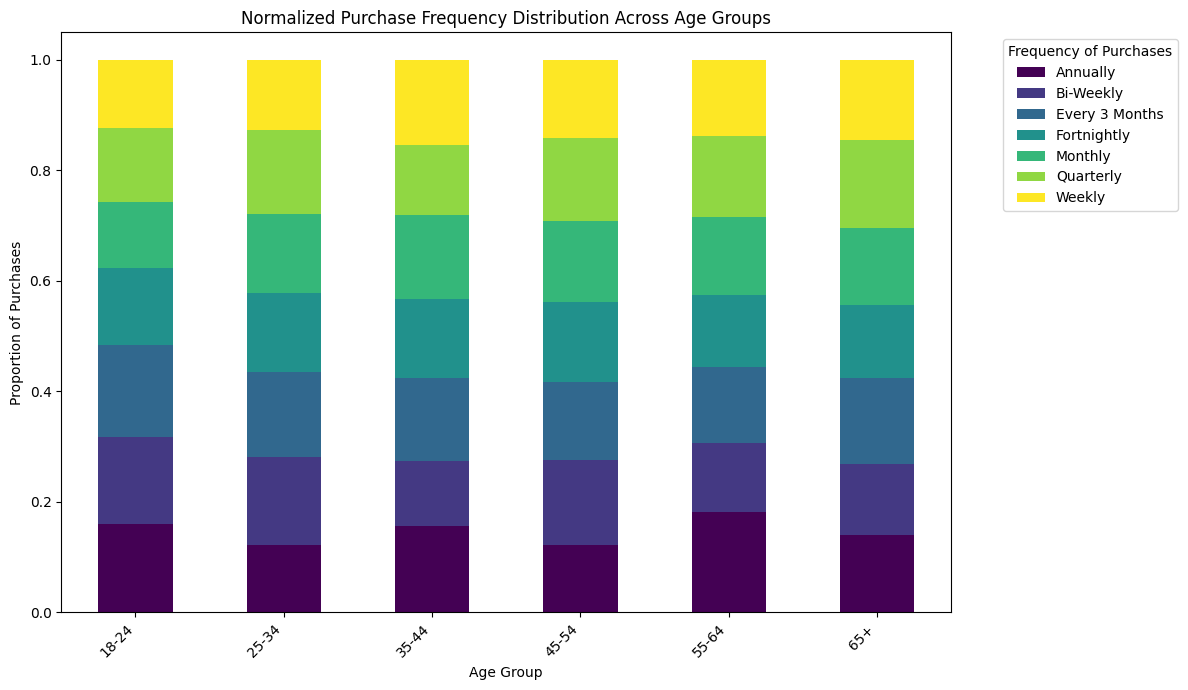

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the crosstab data for percentages within each age group for better comparison
crosstab_normalized = crosstab_age_frequency.div(crosstab_age_frequency.sum(axis=1), axis=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
crosstab_normalized.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

plt.title('Normalized Purchase Frequency Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Purchases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Frequency of Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
# Analyze the relationship between 'Gender' and 'Frequency of Purchases'
crosstab_gender_frequency = pd.crosstab(df['Gender'], df['Frequency of Purchases'])

print("Cross-tabulation of Gender and Frequency of Purchases:")
display(crosstab_gender_frequency)

Cross-tabulation of Gender and Frequency of Purchases:


Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Gender,,,,,,,
Female,185,188,186,163,185,169,172
Male,387,359,398,379,368,394,367


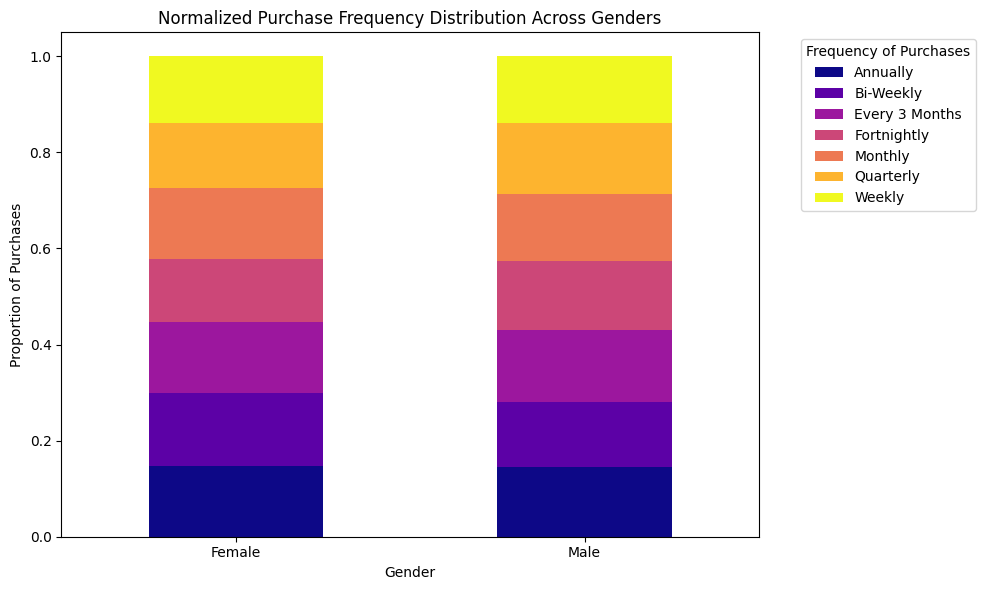

In [15]:
# Normalize the crosstab data for percentages within each gender for better comparison
crosstab_gender_normalized = crosstab_gender_frequency.div(crosstab_gender_frequency.sum(axis=1), axis=0)

# Plotting the stacked bar chart for Gender and Purchase Frequency
fig, ax = plt.subplots(figsize=(10, 6))
crosstab_gender_normalized.plot(kind='bar', stacked=True, ax=ax, cmap='plasma')

plt.title('Normalized Purchase Frequency Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Proportion of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Frequency of Purchases', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Analyze the relationship between 'Gender' and 'Payment Method'
crosstab_gender_payment = pd.crosstab(df['Gender'], df['Payment Method'])

print("Cross-tabulation of Gender and Payment Method:")
display(crosstab_gender_payment)

Cross-tabulation of Gender and Payment Method:


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Gender,,,,,,
Female,203,212,223,181,221,208
Male,409,458,448,455,456,426


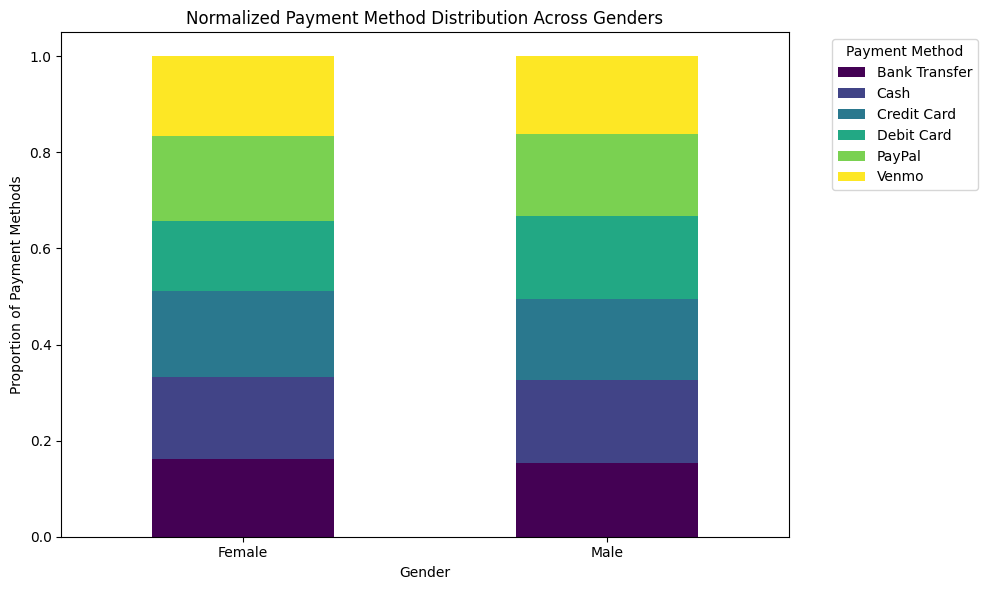

In [18]:
# Normalize the crosstab data for percentages within each gender for better comparison
crosstab_gender_payment_normalized = crosstab_gender_payment.div(crosstab_gender_payment.sum(axis=1), axis=0)

# Plotting the stacked bar chart for Gender and Payment Method
fig, ax = plt.subplots(figsize=(10, 6))
crosstab_gender_payment_normalized.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

plt.title('Normalized Payment Method Distribution Across Genders')
plt.xlabel('Gender')
plt.ylabel('Proportion of Payment Methods')
plt.xticks(rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# Analyze the relationship between 'Review Rating' and 'Shipping Type'
crosstab_rating_shipping = pd.crosstab(df['Review Rating'], df['Shipping Type'])

print("Cross-tabulation of Review Rating and Shipping Type:")
display(crosstab_rating_shipping.head())

Cross-tabulation of Review Rating and Shipping Type:


Shipping Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Review Rating,,,,,,
2.5,8,9,13,18,8,10
2.6,20,22,26,33,20,38
2.7,25,24,32,21,24,28
2.8,22,25,21,21,19,28
2.9,29,28,19,29,31,34


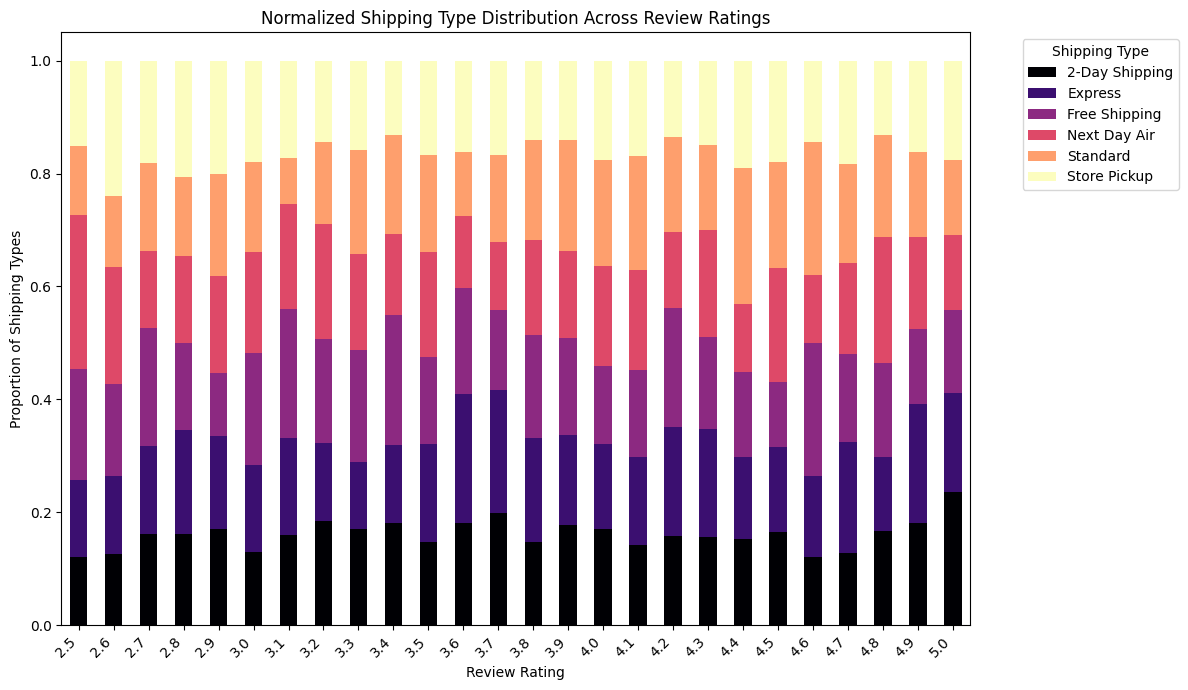

In [20]:
# Normalize the crosstab data for percentages within each review rating for better comparison
crosstab_rating_shipping_normalized = crosstab_rating_shipping.div(crosstab_rating_shipping.sum(axis=1), axis=0)

# Plotting the stacked bar chart for Review Rating and Shipping Type
fig, ax = plt.subplots(figsize=(12, 7))
crosstab_rating_shipping_normalized.plot(kind='bar', stacked=True, ax=ax, cmap='magma')

plt.title('Normalized Shipping Type Distribution Across Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Proportion of Shipping Types')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()